In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from scipy.misc import derivative
import scipy.integrate as intg
import scipy as sp
from astroNN.nn.layers import MCDropout
import math
# np.random.seed(0)

### In this notebook, we use a compressed version of JLA compilation
#### First, we load the trained AutoEncoder

In [2]:
np.random.seed(0)

In [3]:
file2 = '../data/jla_binned_distances_31nodes_v1.txt'
data = pd.read_csv(file2, names=['z', '$D_L$'], sep = " ", skiprows=3)
syscov = np.loadtxt('../data/cov_jla_binned_distances_31nodes_v1.txt',skiprows=1).reshape((31,31))

# shuffle = [x for x in range(len(data.values)) if x%2 == 0]
# comp = [x for x in range(len(data.values)) if x%2 ==1]
# shuffle.extend(comp)
shuffle = [0,1,2,3,4,5,6,7,8,30,28,26,24,22,20,9,10,12,14,16,18,29,27,25,23,21,19,17,15,13,11]

nsize = len(syscov)
# print(data.head(31))
# data.head(31) 
# plt.savefig("DistbinnedJLA.png")
np.shape(syscov)

errors = np.diag(syscov).reshape(nsize,1)
errors = np.where(errors!= 0, np.log(errors), 0)

z = data.values[:,0][shuffle]
dl = data.values[:,1][shuffle]

# FFNN

In [4]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]

# index = np.argsort(z)
zz = np.log10(z)

# scalerz = StandardScaler()
# scalerz.fit(z.reshape(-1, 1))
# zz = scalerz.transform(z.reshape((-1,1)))


scalerdl = StandardScaler()
scalerdl.fit(dl.reshape(-1, 1))
dll = scalerdl.transform(dl.reshape((-1,1)))
# dll = dl.reshape(nsize, 1)


# scalererr = StandardScaler()
# scalererr.fit(errors.reshape(-1, 1))
# errscl = scalererr.transform(errors.reshape((-1,1)))

z_train, z_test = np.split(zz, indx)
y = dll
y_train, y_test = np.split(y, indx)
# y


In [5]:
def model2_dropout(input_z):
    efirst = Dense(100, activation='relu', input_shape=(1,))(input_z)
#     x = MCDropout(0.001)(efirst)
    x = Dense(100, activation='relu')(efirst)
#     x = MCDropout(0.001)(x)
    x = Dense(150, activation='relu')(x)
    x = MCDropout(0.001)(x)
    elast = Dense(1, activation='linear')(x)
    return elast

input_z = Input(shape = (1,))
neural_model2 = Model(input_z, model2_dropout(input_z))
neural_model2.compile(loss='mean_squared_error', optimizer = "adam")
neural_model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               15150     
_________________________________________________________________
MCDropout_1 (MCDropout)      (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151       
Total params: 25,601
Trainable params: 25,601
Non-trainable params: 0
_________________________________________________________

In [6]:
model2_train = neural_model2.fit(z_train, y_train, batch_size=1,
                                    epochs=2000,verbose=1,
                                    validation_data=(z_test, y_test))
#                                     callbacks=callbacks)

Epoch 1/2000
24/24 [==============================] - 0s 11ms/step - loss: 1.3345 - val_loss: 0.3444
Epoch 2/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.8100 - val_loss: 0.3220
Epoch 3/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.4101 - val_loss: 0.0417
Epoch 4/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0206 - val_loss: 0.0142
Epoch 5/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0189 - val_loss: 0.0060
Epoch 6/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 0.0028
Epoch 7/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.0093
Epoch 8/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 9/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.0019
Epoch 10/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 8.566

24/24 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 7.0309e-04
Epoch 82/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0121
Epoch 83/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0053 - val_loss: 7.1709e-04
Epoch 84/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 4.1883e-04
Epoch 85/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 86/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0051
Epoch 87/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.0011
Epoch 88/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 89/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 90/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0043 - val_loss:

Epoch 161/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 162/2000
24/24 [==============================] - 0s 1ms/step - loss: 5.4470e-04 - val_loss: 6.9280e-04
Epoch 163/2000
24/24 [==============================] - 0s 1ms/step - loss: 8.2537e-04 - val_loss: 6.6467e-04
Epoch 164/2000
24/24 [==============================] - 0s 1ms/step - loss: 5.5111e-04 - val_loss: 4.1849e-04
Epoch 165/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 166/2000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 167/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0055
Epoch 168/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 8.7187e-04
Epoch 169/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 170/2000
24/24 [==============================] 

24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 241/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 242/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0052 - val_loss: 0.0023
Epoch 243/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 244/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.0011
Epoch 245/2000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 6.7700e-04
Epoch 246/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0010
Epoch 247/2000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 248/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 249/2000
24/24 [==============================] - 0s 2ms/step - loss: 9.4961e-04 - val_

Epoch 320/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 321/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0120 - val_loss: 0.0112
Epoch 322/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0019
Epoch 323/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 5.2232e-04
Epoch 324/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 325/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 5.5913e-04
Epoch 326/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 6.9532e-04
Epoch 327/2000
24/24 [==============================] - 0s 1ms/step - loss: 5.4236e-04 - val_loss: 0.0016
Epoch 328/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 7.9100e-04
Epoch 329/2000
24/24 [==============================] - 0s 1ms

24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 400/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 401/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0044
Epoch 402/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 403/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 404/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 405/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 406/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 407/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 408/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0039 - val_loss: 0.

24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 479/2000
24/24 [==============================] - 0s 1ms/step - loss: 6.3514e-04 - val_loss: 0.0017
Epoch 480/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 8.4534e-04
Epoch 481/2000
24/24 [==============================] - 0s 1ms/step - loss: 6.4410e-04 - val_loss: 0.0023
Epoch 482/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 483/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 484/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 9.8199e-04
Epoch 485/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0077 - val_loss: 6.7828e-04
Epoch 486/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0048
Epoch 487/2000
24/24 [==============================] - 0s 1ms/step - loss: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 558/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 559/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 560/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 561/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 562/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 8.6929e-04
Epoch 563/2000
24/24 [==============================] - 0s 1ms/step - loss: 9.2866e-04 - val_loss: 0.0014
Epoch 564/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 565/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 566/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_

24/24 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 6.2184e-04
Epoch 637/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 638/2000
24/24 [==============================] - 0s 1ms/step - loss: 9.7704e-04 - val_loss: 5.9550e-04
Epoch 639/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 640/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 641/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 642/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0045 - val_loss: 0.0019
Epoch 643/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 644/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 8.3670e-04
Epoch 645/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.002

24/24 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 716/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 717/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 7.2392e-04
Epoch 718/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 719/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0032
Epoch 720/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 721/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0041 - val_loss: 0.0018
Epoch 722/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 723/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 5.8813e-04
Epoch 724/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_

24/24 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 9.1851e-04
Epoch 795/2000
24/24 [==============================] - 0s 1ms/step - loss: 7.8629e-04 - val_loss: 0.0022
Epoch 796/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0041 - val_loss: 0.0016
Epoch 797/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0038 - val_loss: 7.2551e-04
Epoch 798/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0040 - val_loss: 0.0023
Epoch 799/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 800/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0044 - val_loss: 0.0013
Epoch 801/2000
24/24 [==============================] - 0s 1ms/step - loss: 9.6230e-04 - val_loss: 0.0021
Epoch 802/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 803/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.005

24/24 [==============================] - 0s 1ms/step - loss: 7.6813e-04 - val_loss: 0.0020
Epoch 874/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0023
Epoch 875/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 876/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 9.4516e-04
Epoch 877/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0020
Epoch 878/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.0031
Epoch 879/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 880/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 881/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 882/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0053 - val_

24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 953/2000
24/24 [==============================] - 0s 1ms/step - loss: 7.9500e-04 - val_loss: 9.7682e-04
Epoch 954/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 9.0798e-04
Epoch 955/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 5.6051e-04
Epoch 956/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 957/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 958/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 959/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0040
Epoch 960/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0024
Epoch 961/2000
24/24 [==============================] - 0s 1ms/step - loss: 8.754

Epoch 1031/2000
24/24 [==============================] - 0s 1ms/step - loss: 9.4533e-04 - val_loss: 0.0021
Epoch 1032/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 6.6445e-04
Epoch 1033/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 8.8163e-04
Epoch 1034/2000
24/24 [==============================] - 0s 1ms/step - loss: 7.0777e-04 - val_loss: 0.0019
Epoch 1035/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 7.6830e-04
Epoch 1036/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 1037/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0039
Epoch 1038/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 4.9922e-04
Epoch 1039/2000
24/24 [==============================] - 0s 1ms/step - loss: 6.2920e-04 - val_loss: 4.0189e-04
Epoch 1040/2000
24/24 [==================

24/24 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0037
Epoch 1110/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 1111/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 1112/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 1113/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1114/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 1115/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 1116/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 1117/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0043 - val_loss: 0.0059
Epoch 1118/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0022 - val

24/24 [==============================] - 0s 1ms/step - loss: 5.6018e-04 - val_loss: 0.0012
Epoch 1188/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 1189/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 8.4983e-04
Epoch 1190/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 1191/2000
24/24 [==============================] - 0s 1ms/step - loss: 6.4764e-04 - val_loss: 0.0010
Epoch 1192/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 3.7365e-04
Epoch 1193/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 1194/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0054 - val_loss: 2.2223e-04
Epoch 1195/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 3.9006e-04
Epoch 1196/2000
24/24 [==============================] - 0s 1ms/s

24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 1266/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 1267/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 1268/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 8.1728e-04
Epoch 1269/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 8.9012e-04
Epoch 1270/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 1271/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 3.1218e-04
Epoch 1272/2000
24/24 [==============================] - 0s 1ms/step - loss: 8.8644e-04 - val_loss: 0.0012
Epoch 1273/2000
24/24 [==============================] - 0s 1ms/step - loss: 7.5633e-04 - val_loss: 0.0015
Epoch 1274/2000
24/24 [==============================] - 0s 1ms/step 

Epoch 1343/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 3.9504e-04
Epoch 1344/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 3.3503e-04
Epoch 1345/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0034
Epoch 1346/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 1347/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 1348/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 1349/2000
24/24 [==============================] - 0s 1ms/step - loss: 4.7626e-04 - val_loss: 0.0015
Epoch 1350/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 7.1987e-04
Epoch 1351/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 1352/2000
24/24 [==============================] - 

24/24 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 4.9463e-04
Epoch 1421/2000
24/24 [==============================] - 0s 1ms/step - loss: 6.3054e-04 - val_loss: 0.0011
Epoch 1422/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 1423/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 1424/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 4.1135e-04
Epoch 1425/2000
24/24 [==============================] - 0s 1ms/step - loss: 4.0482e-04 - val_loss: 9.9239e-04
Epoch 1426/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 7.4754e-04
Epoch 1427/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 1428/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 9.5688e-04
Epoch 1429/2000
24/24 [==============================] - 0s 1

24/24 [==============================] - 0s 1ms/step - loss: 9.7924e-04 - val_loss: 4.6333e-04
Epoch 1498/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 1499/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 1500/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 1501/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 9.9078e-04
Epoch 1502/2000
24/24 [==============================] - 0s 1ms/step - loss: 9.8515e-04 - val_loss: 0.0017
Epoch 1503/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 1504/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 1505/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 1506/2000
24/24 [==============================] - 0s 1ms/step - lo

24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 1576/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 1577/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0043 - val_loss: 0.0017
Epoch 1578/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 5.5938e-04
Epoch 1579/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0026
Epoch 1580/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 1581/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 1582/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 1583/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.0042
Epoch 1584/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0058 -

24/24 [==============================] - 0s 1ms/step - loss: 6.7136e-04 - val_loss: 0.0044
Epoch 1654/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 1655/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 1656/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 1657/2000
24/24 [==============================] - 0s 1ms/step - loss: 9.1081e-04 - val_loss: 0.0016
Epoch 1658/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 1659/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 1660/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0050 - val_loss: 0.0019
Epoch 1661/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0038 - val_loss: 0.0012
Epoch 1662/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.00

24/24 [==============================] - 0s 1ms/step - loss: 8.5737e-04 - val_loss: 0.0011
Epoch 1732/2000
24/24 [==============================] - 0s 1ms/step - loss: 8.6078e-04 - val_loss: 7.1033e-04
Epoch 1733/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 1734/2000
24/24 [==============================] - 0s 1ms/step - loss: 9.6838e-04 - val_loss: 0.0011
Epoch 1735/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 8.1928e-04
Epoch 1736/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 6.7379e-04
Epoch 1737/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 1738/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 7.5031e-04
Epoch 1739/2000
24/24 [==============================] - 0s 1ms/step - loss: 3.8408e-04 - val_loss: 9.1706e-04
Epoch 1740/2000
24/24 [==============================

24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 1810/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0043 - val_loss: 8.0324e-04
Epoch 1811/2000
24/24 [==============================] - 0s 1ms/step - loss: 7.8332e-04 - val_loss: 0.0015
Epoch 1812/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 4.3277e-04
Epoch 1813/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 1814/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 1815/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 1816/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 1817/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 1818/2000
24/24 [==============================] - 0s 1ms/step - loss: 

24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 8.2539e-04
Epoch 1887/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 6.2151e-04
Epoch 1888/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 1889/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 5.7839e-04
Epoch 1890/2000
24/24 [==============================] - 0s 1ms/step - loss: 8.0785e-04 - val_loss: 6.0051e-04
Epoch 1891/2000
24/24 [==============================] - 0s 1ms/step - loss: 7.7375e-04 - val_loss: 0.0011
Epoch 1892/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 1893/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 6.1161e-04
Epoch 1894/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 7.2584e-04
Epoch 1895/2000
24/24 [==============================] - 

Epoch 1964/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 1965/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0050 - val_loss: 0.0038
Epoch 1966/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0016
Epoch 1967/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 1968/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 6.7028e-04
Epoch 1969/2000
24/24 [==============================] - 0s 1ms/step - loss: 9.1204e-04 - val_loss: 4.7744e-04
Epoch 1970/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 1971/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 9.4654e-04
Epoch 1972/2000
24/24 [==============================] - 0s 1ms/step - loss: 9.8015e-04 - val_loss: 0.0011
Epoch 1973/2000
24/24 [==============================

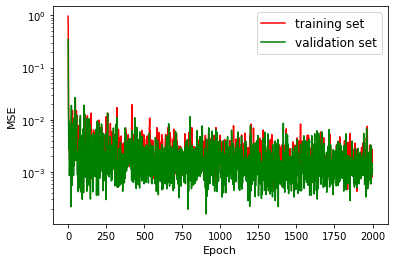

In [7]:
# plt.figure(figsize=(3, 2), dpi=100)

plt.plot(model2_train.history['loss'], color='r', )
plt.plot(model2_train.history['val_loss'], color='g')

plt.ylabel('MSE', fontsize=11)
plt.yscale('log')
plt.xlabel('Epoch', fontsize=11)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
# plt.xticks([])
# plt.yticks([])
# plt.title('FFNN+MC-DO', fontsize=8)

plt.savefig('loss_dropoutJLA2.png')

In [8]:
# file3 = 'fake_binned_JLA2TEST3new.dat'
# data3 = np.loadtxt(file3, skiprows=3)

# z_test = data3[:,0]
z_test = zz
# x_test = zz
# x_test

In [9]:
test_batch_size = 31
# x_test = np.random.uniform(np.min(z), np.max(z), test_batch_size)
# x_test = np.linspace(np.min(z), np.max(z), test_batch_size)

mc_dropout_num = 100# Run Dropout 100 times
predictions = np.zeros((mc_dropout_num, test_batch_size, 1))

for i in range(mc_dropout_num):
    predictions[i] = neural_model2.predict(z_test)
    

prediction_mc_dropout = np.mean(predictions, axis=0, dtype=np.float64)
std_mc_dropout = np.std(predictions, axis=0, dtype=np.float64)

# get mean results and its varience
# pred_err = np.exp(pred_random[:,1].reshape(-1,1))
# pred_err = np.exp(pred_random[:,1].reshape(-1,1))


# sigma = np.sqrt(std_mc_dropout[:, 0]**2 + std_mc_dropout[:, 1]**2+ prediction_mc_dropout[:,1]**2)




In [10]:
# predictions_err

In [11]:
Om = 0.27
# variance network
w0 = -1

# def RHSquared_a_lcdm(a):
# #         return Ezlcdm(a)**2
#     return Om*(1/a)**3 + 1 - Om

def RHSquared_a_owacdm(a, w0, wa):
#         return Ezlcdm(a)**2
    rhow = a**(-3*(1.0+w0+wa))*np.exp(-3*wa*(1-a))
    return (Om/a**3+(1.0-Om)*rhow)

def DistIntegrand_a(a, w0, wa):
#         if model == 'lcdm':
#             return 1./np.sqrt(RHSquared_a_lcdm(a))/a**2
#         elif model == 'owacdm':
        return 1./np.sqrt(RHSquared_a_owacdm(a, w0, wa))/a**2
    
def Da_z(z, w0, wa):
        # r=intg.quad(self.Hinv_z,0,z)
        # this version seems to be faster
        r = intg.quad(DistIntegrand_a, 1./(1+z), 1, args=(w0, wa))

        r = r[0]
      
        return r
    
def distance_modulus(z, w0=-1, wa=0.0):
        # I think this should also work with varyPrefactor as long as BAO is there too
        # assert(not self.varyPrefactor)

        # note that our Da_z is comoving, so we're only
        # multilpyting with a single (1+z) factor
#         return 5*np.log10(Da_z(z, model, w0, wa)*(1+z)) 
    return 5*np.log10(Da_z(z, w0, wa)*(1+z))+43



In [12]:
zmodel = np.linspace(0.01, 1.5, 100)
flcdm = []
fowacdm1 = []
# fowacdm2 = []
# fowacdm3 = []

# flcdm = []
for zzz in zmodel:
    flcdm.append(distance_modulus(zzz, w0=-1, wa=0))
#     fowacdm1.append(distance_modulus(zzz, w0=-1.3, wa=1.2))
    fowacdm1.append(distance_modulus(zzz, w0=-10, wa=-100))
#     fowacdm2.append(distance_modulus(zz, model='owacdm', w0=-1, wa=-0.5))
#     fowacdm3.append(distance_modulus(zz, model='owacdm', w0=-1, wa=0.0))
    
flcdm = np.array(flcdm)
fowacdm1 = np.array(fowacdm1)
# fowacdm2 = np.array(fowacdm2)
# fowacdm3 = np.array(fowacdm3)

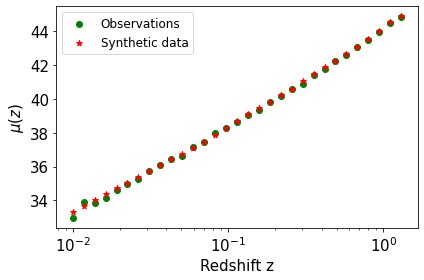

In [13]:
# Plotting
dlfake = scalerdl.inverse_transform(prediction_mc_dropout.reshape(-1,1))[:,0]
# dlfake = prediction_mc_dropout[:,0]
# plt.figure(figsize=(10, 7), dpi=100)

# fakeerrors = np.sqrt(np.abs(np.diagonal(decoded_fake.reshape(31,31))))
# sigma = np.sqrt(std_mc_dropout.reshape(31,))

plt.scatter(z, dl, c='g', label='Observations')
# plt.errorbar(z, dl, errors, fmt='g.', markersize=10, label='Observations')
plt.scatter(z, dlfake, marker='*', c='r', label='Synthetic data')

# plt.errorbar(x_test, dlfake, yerr=sigma
#              , markersize=10, fmt='.', 
#              ecolor='blue', capthick=2, elinewidth=0.9, alpha=0.8, c='r',
#              label='Synthetic data')

# plt.scatter(scalerz.inverse_transform(zz), yy, color='k', label='Original cosmic chronometers')
# plt.plot(zmodel, flcdm, label='$\Lambda CDM$', c='b')
# plt.plot(zmodel, fowacdm1, label='CPL $w_0 = -1.3, w_a=1.2$', c='m')
# plt.plot(zmodel, fowacdm2, label='$\omega_0\omega_aCDM \;\; \omega_a=-0.5$', c='y')
# plt.plot(zmodel, Hlcdm(zmodel), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
# plt.plot(zmodel, Hlcdm(zmodel, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
# plt.xlim(-0.01, np.max(z)+0.2)
plt.xlabel("Redshift z", fontsize=15)
plt.ylabel("$\mu(z)$", fontsize=15)
# plt.xlim(0, np.max(z))
plt.xticks(fontsize=15)
# plt.text(0.6, 45, 'FFNN+MC-DO', fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')

plt.tight_layout()
plt.legend(loc='upper left', fontsize=12)
# plt.show()
plt.savefig('DL_dropoutb2.png')

In [14]:
index = np.argsort(z_test)
fake_data2 = np.stack((z[index], dlfake[index]), axis=1)


np.savetxt("fake_binned_JLADO.dat",  fake_data2, delimiter= " ", header="#fake data\n# z\n# mu", fmt='%1.9f')

In [15]:
tf.keras.models.save_model(neural_model2, '../models/FFNN_JLA_DO.h5' )